# Les imports

In [36]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


# Présenetation du dataset

* Le dataset a 10 attributs numériques et 8 attributs catégoriels:
 * les 10 attributs numériques: 
    * `BounceRates`
    * `ExitRates`
    * `PageValues`
    * `SpecialDay`
    * `Month`
    * `OperatingSystems`
    * `Browser`
    * `Region`
    * `TrafficType`
    * `VisitorType`
  * 8 attributs catégoriels:
      * `Revenue`: Étiquette de classe
      * `Administratif` : Nombre de pages de type Administratif visitées par l'utilisateur
      * `Administrative_Duration`: Le temps total passé sur les pages Administratif
      * `Information` : Nombre de pages de type Information visitées par l'utilisateur
      * `Informational_Duration` : Le temps total passé sur les pages Information
      * `ProductRelated`: Nombre de pages de type ProductRelated visitées par l'utilisateur
      * `ProductRelated_Duration` : Le temps total passé sur les pages ProductRelated
      * `Weekend` : 

## recupération du dataset

In [2]:
clients=pd.read_csv("./online_shoppers_intention.csv")


## Infos du dataframe

In [3]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Premières ligne

In [4]:
clients.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Description

In [5]:
clients.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# Nettoyage des données

## Le nombre de nan par colonne

In [6]:
clients.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

## Exemple avec la colonne Administrative

In [7]:
val_nan = []
for i in clients.Administrative:
    if(math.isnan(i)):
        val_nan.append(i)
        
print('Il y a :'.format(len(val_nan)),len(val_nan))
val_nan

Il y a : 14


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

## Valeurs manquantes: `Administrative`, `Informational`, `ProductRelated`

### Processus :

* Remplacer les 0 par none
* Puis remplace des none par la `médiane`

### Nombre de none dans les 3 colonnes

In [8]:
val_nominatif = ['Administrative','Informational','ProductRelated']
[clients[cols].isnull().sum() for cols in val_nominatif]

[14, 14, 14]

### Remplacement des zéro par none

In [9]:
for cols in val_nominatif:
    clients[cols].replace(0, np.nan, inplace= True)
    
[clients[cols].isnull().sum() for cols in val_nominatif]

[5768, 9700, 49]

In [10]:
# imputation avec la mediane 

In [11]:
for cols in val_nominatif:
    median_value=clients[cols].median()
    clients[cols]=clients[cols].fillna(median_value)
    
    
[clients[cols].isnull().sum() for cols in val_nominatif]

[0, 0, 0]

# les colonnes avec des valeurs négatives 'Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates'

In [39]:
val_imputer = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration']

[clients[cols].replace(0, np.nan, inplace= True) for cols in val_imputer]
[clients[cols].replace(-1, np.nan, inplace= True) for cols in val_imputer]    
    
[clients[cols].isnull().sum() for cols in val_imputer]

[0, 0, 0]

### Rremplace les none par la moyenne des colonnes de la liste val_imputer

In [14]:
values = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates']
for cols in values:
    mean_value=clients[cols].mean()
    clients[cols]=clients[cols].fillna(mean_value)
    

    
[clients[cols].isnull().sum() for i in values]

[0, 0, 0, 0, 0]

# Description du dataframe aprés nettoyage

In [15]:
clients.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,3.718573,155.069012,2.076805,176.794370,31.799351,1273.817485,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,2.603140,158.901765,0.836755,122.082566,44.441310,1888.842763,0.048400,0.048500,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,1.000000,1.333333,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,83.000000,2.000000,176.794370,7.000000,264.272421,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,3.000000,155.069012,2.000000,176.794370,18.000000,750.187500,0.003125,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,155.069012,2.000000,176.794370,38.000000,1464.157214,0.016941,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# Visualisation

## Duration of page vs Revenue

<AxesSubplot:xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

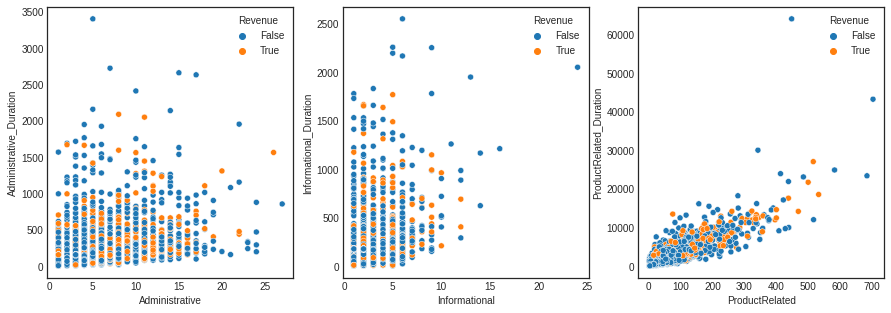

In [30]:
plt.figure(figsize = (15, 5))
plt.subplot(131)
sns.scatterplot(x="Administrative", y="Administrative_Duration",hue="Revenue", data=clients)
plt.subplot(132)
sns.scatterplot(x="Informational", y="Informational_Duration",hue="Revenue", data=clients)
plt.subplot(133)
sns.scatterplot(x="ProductRelated", y="ProductRelated_Duration",hue="Revenue", data=clients)

## Bounce & Exit Rates Vs Revenue

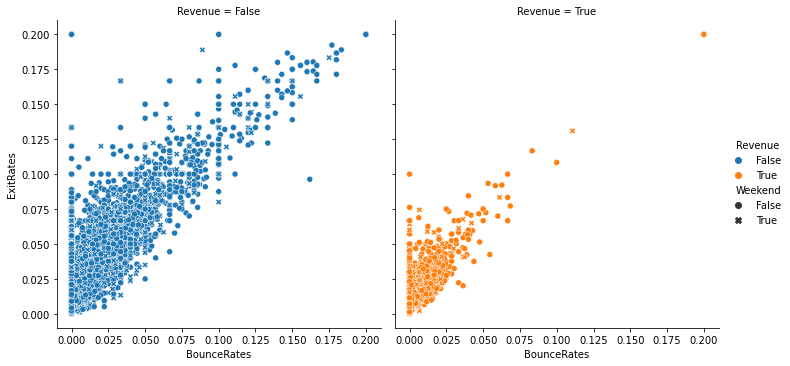

In [17]:
sns.relplot(x="BounceRates", y="ExitRates",col="Revenue",hue="Revenue",style="Weekend", data=clients)

## Visitor type & Exit Rates Vs Revenue

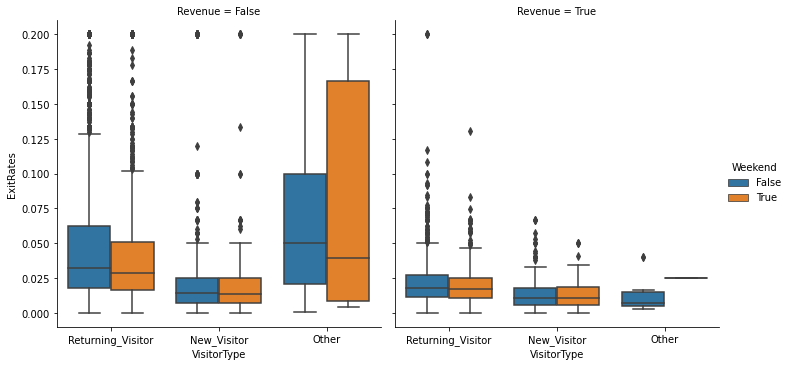

In [18]:
sns.catplot(x="VisitorType", y="ExitRates",
                hue="Weekend", col="Revenue",
                data=clients, kind="box");

## Carte de corrélation

<AxesSubplot:>

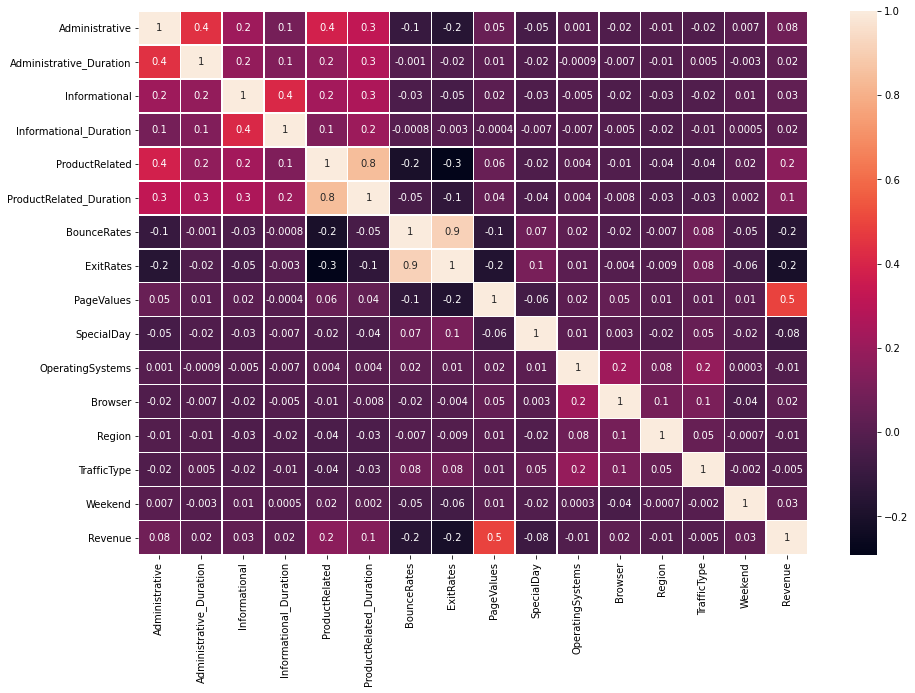

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(clients.corr(),annot=True,fmt='.1g', linewidths=.5, ax=ax)

## Mise à l'échelle

In [20]:
Categorical_variables=['Weekend','Revenue','Administrative','Informational','ProductRelated','SpecialDay',
 'OperatingSystems','Browser','Region','Month','TrafficType','VisitorType']

In [21]:
from sklearn.preprocessing import StandardScaler

scale=[feature for feature in clients.columns if feature not in Categorical_variables]

scaler=StandardScaler()
scaler.fit(clients[scale])

StandardScaler()

In [28]:
scaled_data = pd.concat([clients[Categorical_variables].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(clients[scale]), columns=scale)],
                    axis=1)
scaled_data.head()

,Weekend,Revenue,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,False,False,3.0,2.0,1.0,0.0,1,1,1,Feb,1,Returning_Visitor,0.0,2.328167e-16,0.000000,3.674713,3.237210,-0.317178
1,False,False,3.0,2.0,2.0,0.0,2,2,1,Feb,2,Returning_Visitor,0.0,2.328167e-16,-0.640533,-0.457718,1.175259,-0.317178
2,False,False,3.0,2.0,1.0,0.0,4,1,9,Feb,3,Returning_Visitor,0.0,2.328167e-16,0.000000,3.674713,3.237210,-0.317178
3,False,False,3.0,2.0,2.0,0.0,3,2,2,Feb,4,Returning_Visitor,0.0,2.328167e-16,-0.673006,0.575390,2.000039,-0.317178
4,True,False,3.0,2.0,10.0,0.0,3,3,1,Feb,4,Returning_Visitor,0.0,2.328167e-16,-0.342190,-0.044475,0.144284,-0.317178


# Labelisation

In [23]:
from sklearn.preprocessing import LabelEncoder
encoded_features=['Month','VisitorType']

label_data = scaled_data.copy()
label_encoder = LabelEncoder()
for col in encoded_features:
    label_data[col] = label_encoder.fit_transform(scaled_data[col])
    
label_data.head()

,Weekend,Revenue,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,False,False,3.0,2.0,1.0,0.0,1,1,1,2,1,2,0.0,2.328167e-16,0.000000,3.674713,3.237210,-0.317178
1,False,False,3.0,2.0,2.0,0.0,2,2,1,2,2,2,0.0,2.328167e-16,-0.640533,-0.457718,1.175259,-0.317178
2,False,False,3.0,2.0,1.0,0.0,4,1,9,2,3,2,0.0,2.328167e-16,0.000000,3.674713,3.237210,-0.317178
3,False,False,3.0,2.0,2.0,0.0,3,2,2,2,4,2,0.0,2.328167e-16,-0.673006,0.575390,2.000039,-0.317178
4,True,False,3.0,2.0,10.0,0.0,3,3,1,2,4,2,0.0,2.328167e-16,-0.342190,-0.044475,0.144284,-0.317178


# Train et test 

In [27]:
from sklearn.model_selection import train_test_split

X=label_data.drop(['SpecialDay','VisitorType','Weekend','Revenue'],axis=1)
y=label_data.Revenue

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
X_train.shape ,X_test.shape,y_train.shape,y_test.shape

((9864, 14), (2466, 14), (9864,), (2466,))

# Selection du bon modél cross-validation

In [25]:

logreg_cv = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000)
dt_cv=DecisionTreeClassifier()
rt_cv=RandomForestClassifier()
knn_cv=KNeighborsClassifier()

cv_models = dict(Logistic_Regression = logreg_cv, Decision_Tree = dt_cv, RandomForest = rt_cv, KNN = knn_cv)
scores = [key + ": " + str(cross_val_score(value, X, y, cv=10, scoring ='accuracy').mean()*100) + '%' for key, value in cv_models.items()]
scores

['Logistic_Regression: 88.29683698296836%',
 'Decision_Tree: 84.89862124898619%',
 'RandomForest: 89.57826439578265%',
 'KNN: 85.10137875101378%']

In [26]:
max(scores)

'RandomForest: 89.57826439578265%'

## RandomForest avec Hyperparamétres 

In [37]:
pipe = make_pipeline((RandomForestClassifier()))

grid_param = [{
    "randomforestclassifier": [RandomForestClassifier()],           
    "randomforestclassifier__n_estimators": [10, 100, 1000],
    "randomforestclassifier__max_depth":[5,8,15,25,30,None],
    "randomforestclassifier__min_samples_leaf":[1,2,5,10,15,100],
    "randomforestclassifier__max_leaf_nodes": [2, 5,10]}
]

gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0, n_jobs=-1)
best_model = gridsearch.fit(X_train,y_train)


In [40]:
best_model.best_estimator_


Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_leaf_nodes=10,
                                        min_samples_leaf=5))])

In [42]:
best_model.score(X_test,y_test) * 100

90.30819140308192